In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Dataset Definition

In [2]:
df = pd.read_csv("countries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       253 non-null    object 
 1   demonym       244 non-null    object 
 2   id            252 non-null    object 
 3   iso2          249 non-null    object 
 4   tld           246 non-null    object 
 5   currency      245 non-null    object 
 6   population    239 non-null    float64
 7   density       237 non-null    float64
 8   area          242 non-null    float64
 9   gdp           206 non-null    float64
 10  median_age    225 non-null    float64
 11  language      245 non-null    object 
 12  website       240 non-null    object 
 13  calling_code  238 non-null    float64
 14  driving_side  252 non-null    object 
 15  continent     250 non-null    object 
 16  un_member     253 non-null    bool   
 17  religion      247 non-null    object 
dtypes: bool(1), float64(6), object

In [3]:
df = df.dropna()
df.isna().sum()

country         0
demonym         0
id              0
iso2            0
tld             0
currency        0
population      0
density         0
area            0
gdp             0
median_age      0
language        0
website         0
calling_code    0
driving_side    0
continent       0
un_member       0
religion        0
dtype: int64

In [4]:
cdf = df[["country", "population", "gdp", "continent", "religion", "area"]]
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 223
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     195 non-null    object 
 1   population  195 non-null    float64
 2   gdp         195 non-null    float64
 3   continent   195 non-null    object 
 4   religion    195 non-null    object 
 5   area        195 non-null    float64
dtypes: float64(3), object(3)
memory usage: 10.7+ KB


In [5]:
cdf.describe()

,population,gdp,area
count,1.950000e+02,1.950000e+02,1.950000e+02
mean,4.007075e+07,5.065345e+05,6.669032e+05
std,1.478626e+08,2.313118e+06,1.922778e+06
min,9.852000e+03,5.900000e+01,2.000000e+00
25%,1.308784e+06,7.922000e+03,1.759100e+04
50%,7.852377e+06,3.248800e+04,1.088890e+05
75%,3.032700e+07,2.398660e+05,4.691400e+05
max,1.413143e+09,2.574410e+07,1.709824e+07


### Preprocessing

In [6]:
cdf = cdf.copy()

mean_area1 = cdf.groupby("continent")["area"].mean()
cdf["continent_encoded"] = cdf["continent"].map(mean_area1)

cdf.drop("continent", axis=1, inplace=True)
cdf.head(0)

,country,population,gdp,religion,area,continent_encoded


In [7]:
mean_area2 = cdf.groupby("religion")["area"].mean()
cdf["religion_encoded"] = cdf["religion"].map(mean_area2)

cdf.drop("religion", axis=1, inplace=True)
cdf.head(0)

,country,population,gdp,area,continent_encoded,religion_encoded


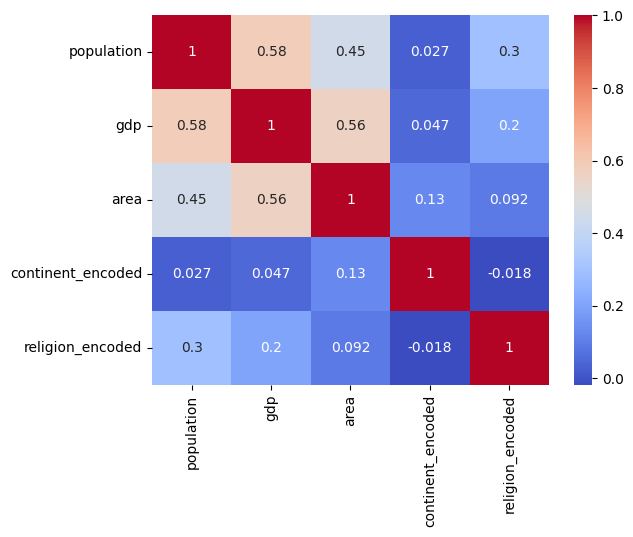

In [8]:
corr = cdf.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [10]:
msk = np.random.rand(len(cdf)) < 0.8
train, test = cdf[msk], cdf[~msk]

train.shape, test.shape

((156, 6), (39, 6))

### Model Definition